## Observations and Insights 

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.

#### Primary result analysis:

This analysis has shown clearly indicates that Capomulin has enourmous potential. The summary statistics table shows that out of all of the drug regimens, Capomulin had the second lowest mean, median, variance, standard deviation and SEM after Ramicane.

The bar charts showing the data points shows that there were more data points for the use of Capomulin than any other - this is not surprising given the focus of the originalpurpose explained above. However, this has not impacted the data results with respect to effectiveness of the drug. Ramicane has still produced slightly better results as shown in the box plot with respect to the quartiles and upper bounds.

An excellent example of the effectiveness of Capomulin is shown in the treatment of mouse ID y793 (line graph), with a marked drop over the 45 day time period. However, this particular mouse had a slight up-tick after the 40 day marker. However, the pattern has clearly droped from over 44mm3 (tumor volume) to under 32mm3 at the 40 day mark. A 12mm3 drop or approximately a 30% drop in tumor size.

Lastly, looking at the scatter plot and regression/correlation we can see a clear picture of the affectivenes of both the tumor volume and the weight.

In conclusion, although not as effective (slightly) than Ramicane the drug Capomulin significantly out-performs all the other drug regimens looked at in the study and worked on both the male and female mice.

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = mouse_metadata.merge(study_results, left_on= 'Mouse ID', right_on= 'Mouse ID')

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of mice.

len(combined_data['Mouse ID'].unique())


249

In [77]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [78]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data.loc[combined_data['Mouse ID']!= 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [80]:
# Checking the number of mice in the clean DataFrame.

len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_df.groupby(['Drug Regimen']).mean()

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
Std = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

pd.DataFrame({'Mean': mean,
            'Median': median,
            'Variance': var,
            'Standard Deviation': Std,
            'SEM': sem})



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# This method produces everything in a single groupby function

clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

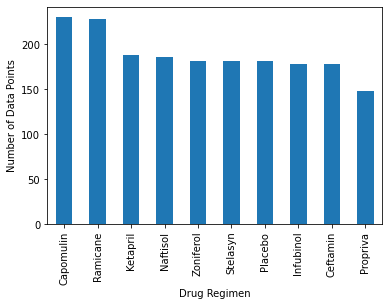

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

new_clean_df = clean_df['Drug Regimen'].value_counts()

new_clean_df.plot.bar()
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')

#DataFrame.plot.bar(x=None, y=None, **kwargs)



<BarContainer object of 10 artists>

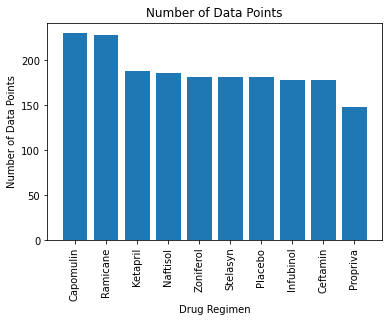

In [85]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.title('Number of Data Points')

plt.bar(new_clean_df.index.values, new_clean_df.values)


<AxesSubplot:ylabel='Sex'>

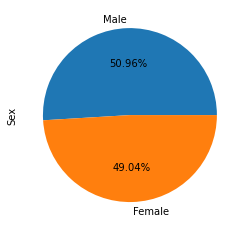

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

new_clean_df = clean_df['Sex'].value_counts()
new_clean_df.plot.pie(autopct='%.2f%%')


# Pie chart, where the slices will be ordered and plotted counter-clockwise:


Text(0, 0.5, 'Sex')

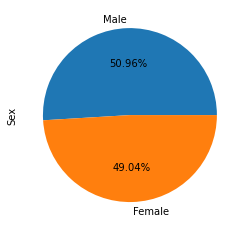

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(new_clean_df.values, labels= new_clean_df.index.values, autopct='%.2f%%')
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

combined_data = mouse_metadata.merge(study_results, left_on= 'Mouse ID', right_on= 'Mouse ID')


# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_data


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [89]:
#Final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

combined_max_df = merged_data[merged_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
combined_max_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [90]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_values = []

for drug in drug_regimen:
  
    treatment_list = combined_max_df.loc[combined_max_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
       
    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = treatment_list.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}') 
    
   
    # add subset 
    
    drug_values.append(treatment_list)
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)  
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    #if tumor volume is less than my lower boound then this is an outlier, if it is greater than the upper bound, the same applies
    
    outliers = (treatment_list.loc[(treatment_list >= upper_bound) | 
                                        (treatment_list <= lower_bound)]).count()
    
    print(f'Number of {drug} outliers: {outliers}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


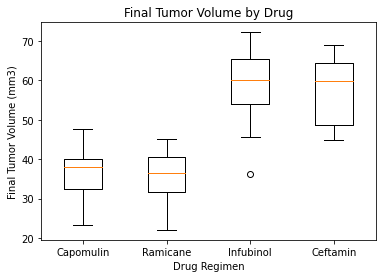

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot boxplot

plt.boxplot(drug_values)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

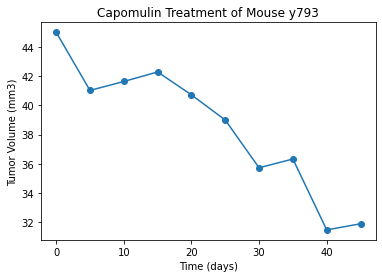

In [92]:
# Generate a line plot of time point versus tumor volume for a(ny) mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin
mouse = clean_df.loc[clean_df['Mouse ID'] == 'y793']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')


plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse y793")

# Display plot
plt.show()

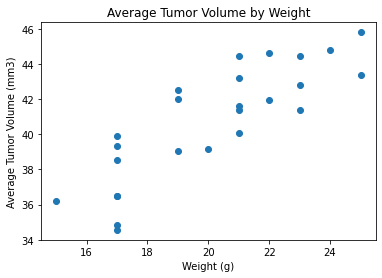

In [93]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

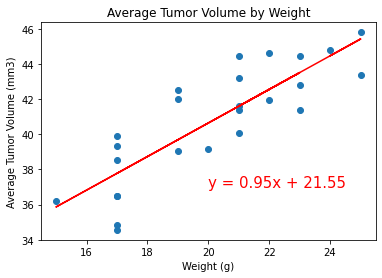

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Duplicate code for scatter plot from above:

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']
                          


# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()